In [1]:
import os
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_openai import AzureChatOpenAI
from langgraph.graph import StateGraph, END


In [2]:
messages = [AIMessage(content=f"So you want to learn more about converting SAS code to Python code?", name='Model')]
messages.extend([HumanMessage(content=f"Yeah, that's right.", name = 'Hanan')])
messages.extend([AIMessage(content=f"Is there something specific you wanted me to help you with Converting SAS code to Python?", name='Model')])
messages.extend([HumanMessage(content=f"I want to learn the best practices for using LLMs to convert a SAS program into a Python program.", name = 'Hanan')])

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you want to learn more about converting SAS code to Python code?
================================ Human Message =================================
Name: Hanan

Yeah, that's right.
================================== Ai Message ==================================
Name: Model

Is there something specific you wanted me to help you with Converting SAS code to Python?
================================ Human Message =================================
Name: Hanan

I want to learn the best practices for using LLMs to convert a SAS program into a Python program.


### What’s happening under the hood

The `AzureChatOpenAI` class really just wraps the official OpenAI Python client and uses **Pydantic’s BaseSettings** to pull defaults from well-known environment variables.  Its key constructor signature (simplified) looks like:

```python
AzureChatOpenAI(
    azure_deployment: str,
    api_version: str,
    azure_api_key: SecretStr = None,
    azure_endpoint: str    = None,
    **kwargs
)
```
- `azure_api_key`
- If you don’t pass it, LangChain will look for `AZURE_OPENAI_API_KEY`.
– `azure_endpoint`
– If you don’t pass it, LangChain will look for `AZURE_OPENAI_ENDPOINT`.
– `azure_deployment`
– No default: you must supply the name of your model deployment (e.g. "gpt-35-turbo").
– `api_version`
–  No default: you must supply the Azure OpenAI API version (e.g. "2023-06-01-preview").

Under the covers it does roughly:

In [9]:
llm = AzureChatOpenAI(
    azure_deployment= os.environ["AZURE_OPENAI_DEPLOYMENT"],
    api_version= os.environ["AZURE_OPENAI_API_VERSION"],
)
result = llm.invoke(messages)


In [10]:
from IPython.display import display, HTML

def wrap_output(text, width=100):
    display(HTML(f"""
    <div style="white-space: pre-wrap; word-wrap: break-word; width: {width}%;">
        {text}
    </div>
    """))

In [11]:
result

AIMessage(content="Here are some best practices to follow when using large language models (LLMs) to convert a SAS program into a Python program:\n\n1. Clarify Your Objectives and Context:\n   • Define what “conversion” means in your case. Are you after a literal translation of SAS code logic to Python code (for example, converting DATA steps and PROC procedures to Pandas or NumPy operations) or a complete rewrite that takes advantage of Python best practices?\n   • Provide context about the SAS environment (e.g., use of macros, specific PROC steps) and what libraries or frameworks in Python you plan to adopt (like Pandas, NumPy, or specialized statistical libraries).\n\n2. Break Down the SAS Program into Manageable Parts:\n   • Instead of pasting an entire SAS script, segment it into smaller, logically isolated parts (data import steps, data transformation, analysis procedures).\n   • Ask the LLM to convert each segment. It makes it easier to review, test, and adjust as needed.\n   • 

In [15]:
wrap_output(result)

In [16]:
result.response_metadata

{'token_usage': {'completion_tokens': 996,
  'prompt_tokens': 85,
  'total_tokens': 1081,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 320,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'o3-mini-2025-01-31',
 'system_fingerprint': 'fp_db33bdfc5e',
 'id': 'chatcmpl-BOowgNeqHCjoDyBmcce87xH9d6Zxe',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'jailbreak': {'filtered': False, 'detected': False},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'finish_reason': 'stop',
 'logprobs': None,
 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
  'protected_material_code': {'filtered': False, 'detected': False},
  'protected_mat

In [22]:
def multiply(a: int, b: int) -> int:
    """Multiplies two integers together and returns the result.
    
    This function performs basic integer multiplication. It is designed to be used
    as a simple arithmetic operation tool for LLMs.
    
    Args:
        a (int): The first integer to multiply
        b (int): The second integer to multiply
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])


tool_call = llm_with_tools.invoke([HumanMessage(content=f"what is 2 multiplied by 3", name='Hanan')])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oQPU4SDZahMzryB702n8BCJy', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 100, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o3-mini-2025-01-31', 'system_fingerprint': 'fp_ded0d14823', 'id': 'chatcmpl-BOpFh4Ok1VhcOhF4c2oolCpWlViLM', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'tool_calls

In [23]:
tool_call.additional_kwargs['tool_calls']

[{'id': 'call_oQPU4SDZahMzryB702n8BCJy',
  'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'multiply'},
  'type': 'function'}]

In [25]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [26]:
initial_messages = [AIMessage(content=f"So you want to learn more about converting SAS code to Python code?", name='Model'), 
                    HumanMessage(content=f"Yeah, that's right.", name = 'Hanan')]

# New message to add
new_message = [AIMessage(content=f"Is there something specific you wanted me to help you with Converting SAS code to Python?", name='Model')]

#test
add_messages(initial_messages, new_message)

[AIMessage(content='So you want to learn more about converting SAS code to Python code?', additional_kwargs={}, response_metadata={}, name='Model', id='eb803490-6599-46b0-8893-6999ce359cc0'),
 HumanMessage(content="Yeah, that's right.", additional_kwargs={}, response_metadata={}, name='Hanan', id='bb417994-ca34-4b00-bd88-e9a2342eea02'),
 AIMessage(content='Is there something specific you wanted me to help you with Converting SAS code to Python?', additional_kwargs={}, response_metadata={}, name='Model', id='c8eac579-3d86-4883-8889-bd7a3bbc72fd')]

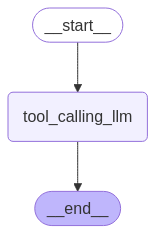

In [28]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
# State

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

# Node

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build a graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# view
display(Image(graph.get_graph().draw_mermaid_png()))








In [31]:
messages = graph.invoke({"messages":  [HumanMessage(content="Hello")]})

In [32]:
messages

{'messages': [AIMessage(content='Hello! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 91, 'total_tokens': 178, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o3-mini-2025-01-31', 'system_fingerprint': 'fp_ded0d14823', 'id': 'chatcmpl-BOqBS6HQV0qgq7fxSjLmrru1bBeUF', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protect

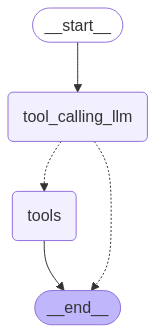

In [39]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import MessagesState


class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

# Node

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build a graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", END)
graph = builder.compile()

# view
display(Image(graph.get_graph().draw_mermaid_png()))



In [40]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="Multiply 2 and 4.")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

Multiply 2 and 4.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uP0zLIOGy3yeWYleb4C4UFmm)
 Call ID: call_uP0zLIOGy3yeWYleb4C4UFmm
  Args:
    a: 2
    b: 4
================================= Tool Message =================================
Name: multiply

8
